In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
df = pd.read_csv("co2_emission.csv") # Dataset
df.head() 
df.isnull().sum() # for missing values

df.describe() # for summary


,Year,Annual CO₂ emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [15]:
print(df.columns)


Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )'], dtype='object')


In [16]:
df.columns = df.columns.str.strip()  
df.rename(columns={'Annual CO₂ emissions (tonnes )': 'CO2_Emissions'}, inplace=True)


In [18]:
df = df[['Year', 'CO2_Emissions']]
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df['CO2_Emissions'] = df['CO2_Emissions'].astype(float)


In [19]:
df.head()


,Year,CO2_Emissions
0,1949,14656.0
1,1950,84272.0
2,1951,91600.0
3,1952,91600.0
4,1953,106256.0


In [21]:
X = df[['Year']]
y = df['CO2_Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 302118932.57214266
Mean Squared Error: 1.3694190622025267e+18
R² Score: 0.003116225206192147


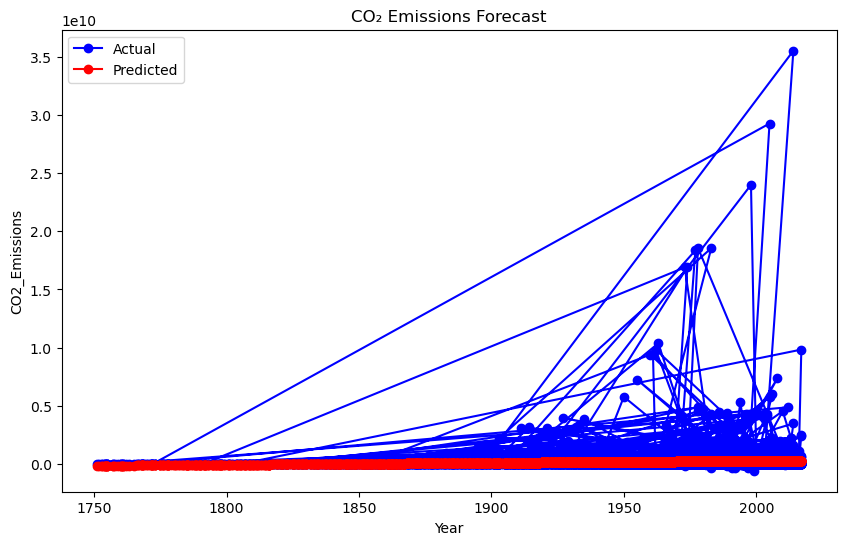

In [28]:
plt.figure(figsize=(10,6))
# actual CO2 emissions
plt.plot(X_test, y_test, color='blue', linestyle='-', marker='o', label="Actual")

# predicted CO2 emissions 
plt.plot(X_test, y_pred, color='red', linestyle='-', marker='o', label="Predicted")

plt.xlabel("Year")
plt.ylabel("CO2_Emissions")
plt.title("CO₂ Emissions Forecast")

plt.legend()
plt.show()
